In [ ]:
import pandas as pd

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0     Area         Item  Year  average_rain_fall_mm_per_year  \
0           0  Albania        Maize  1990                           1485   
1           1  Albania     Potatoes  1990                           1485   
2           2  Albania  Rice, paddy  1990                           1485   
3           3  Albania      Sorghum  1990                           1485   
4           4  Albania     Soybeans  1990                           1485   

   pesticides_tonnes  avg_temp  hg/ha_yield  
0              121.0     16.37        36613  
1              121.0     16.37        66667  
2              121.0     16.37        23333  
3              121.0     16.37        12500  
4              121.0     16.37         7000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     282

In [ ]:
x = data.drop(labels=['hg/ha_yield'], axis=1)
y = data['hg/ha_yield']

In [ ]:
#split data to x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40,shuffle=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Evaluation function for regression models
def regression_report(y_true, y_pred):

    error = y_true - y_pred

    #Evaluation matrics
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    maxerr = max_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    metrics = [
        ('Mean Absolute Error', mae),
        ('Median Absolute Error', medae),
        ('Mean Squared Error', mse),
        ('Root Mean Squared Error', rmse),
        ('Max error', maxerr) ,
        ('R2 score', r_squared),
        ('Explained variance score', evs),
        ('Mean Absolute Percentage Error', mape)
    ]

    print('Regression Report:')
    for metric_name, metric_value in metrics:
        print(f'\t\t\t{metric_name:30s}: {metric_value: >20.3f}')

    return mae, medae, mse, rmse, maxerr, r_squared, evs, mape

NameError: name 'y_pred_train' is not defined

Training Confusion Matrix:
[[9853    0]
 [   0 9916]]

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9853
           1       1.00      1.00      1.00      9916

    accuracy                           1.00     19769
   macro avg       1.00      1.00      1.00     19769
weighted avg       1.00      1.00      1.00     19769

Test Confusion Matrix:
[[4205   68]
 [  64 4136]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4273
           1       0.98      0.98      0.98      4200

    accuracy                           0.98      8473
   macro avg       0.98      0.98      0.98      8473
weighted avg       0.98      0.98      0.98      8473



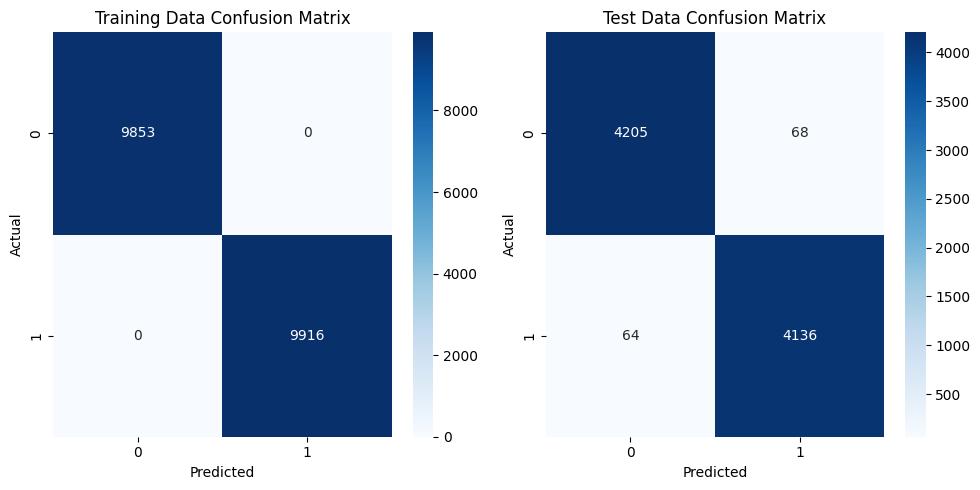

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Preprocess the data (example: encoding and scaling)
data = data.drop(columns=['Unnamed: 0'])
data = pd.get_dummies(data, columns=['Area', 'Item'])
X = data.drop(columns=['hg/ha_yield'])
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Confusion Matrix and Classification Report for Training Data
cm_train = confusion_matrix(y_train, y_pred_train)

print("\nTraining Classification Report:")
print(classification_report(y_train, y_pred_train))

# Confusion Matrix and Classification Report for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Visualize Confusion Matrices
plt.figure(figsize=(10, 5))

# Plot confusion matrix for training data
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Training Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for test data
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Test Data Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Assume y_true and y_pred are your actual and predicted prices (y_test and y_pred_test in this context)
y_true = y_test  # Replace with actual target values
y_pred = clf.predict(X_test)  # Replace with predicted values from your model

# Calculate MSE, RMSE, MAPE, and R2
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

# Analyze the regression model's performance based on these metrics


MSE: 0.015578897674967543
RMSE: 0.12481545447166205
MAPE: 36143606120759.32
R2 Score: 0.9376797833572933


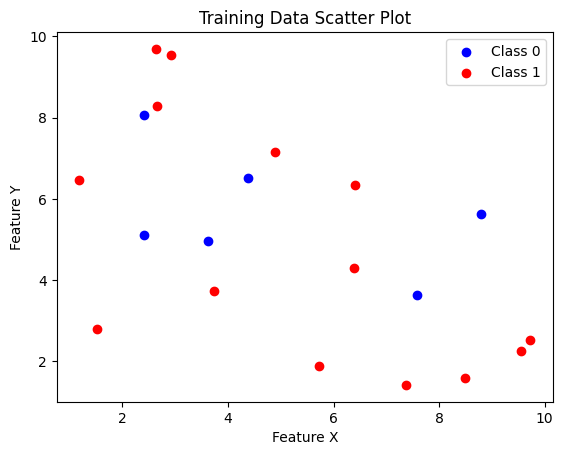

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 data points with features X and Y between 1 and 10
np.random.seed(42)
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign these points to two classes (class0 - Blue, class1 - Red)
classes = np.random.choice([0, 1], 20)

# Scatter plot of the training data
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data Scatter Plot')
plt.legend()
plt.show()

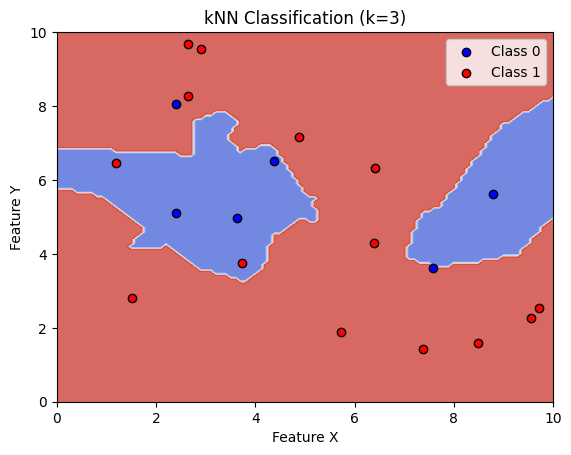

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test set with values of X and Y varying between 0 and 10 in increments of 0.1
X_test_knn = np.arange(0, 10.1, 0.1)
Y_test_knn = np.arange(0, 10.1, 0.1)
X_test_knn, Y_test_knn = np.meshgrid(X_test_knn, Y_test_knn)
test_points = np.c_[X_test_knn.ravel(), Y_test_knn.ravel()]

# Train a kNN classifier (k = 3) on the generated training data
train_data = np.c_[X, Y]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes)

# Classify the test points
predicted_classes = knn.predict(test_points)

# Reshape the predicted classes back to the grid shape
Z = predicted_classes.reshape(X_test_knn.shape)

# Plot the decision boundary
plt.contourf(X_test_knn, Y_test_knn, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', edgecolor='k', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', edgecolor='k', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification (k=3)')
plt.legend()
plt.show()


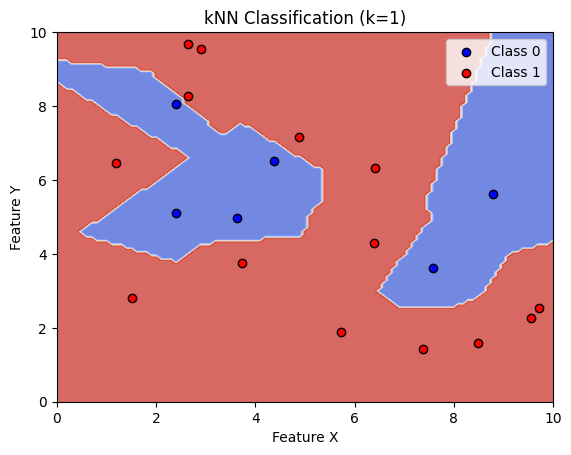

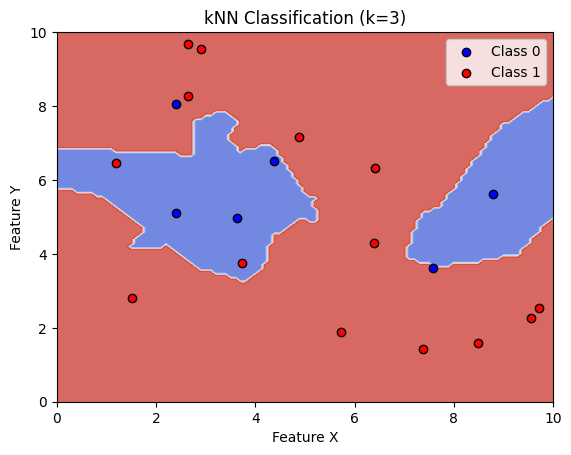

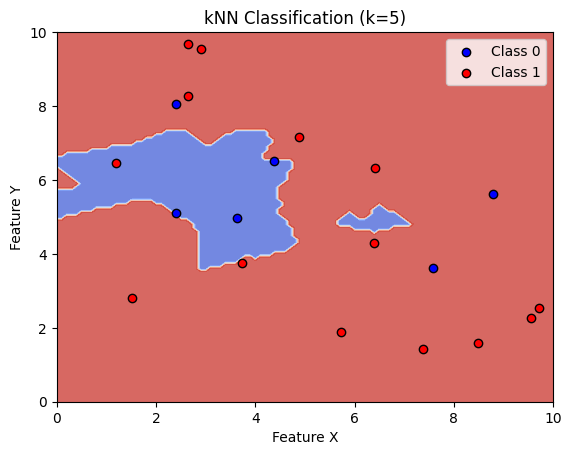

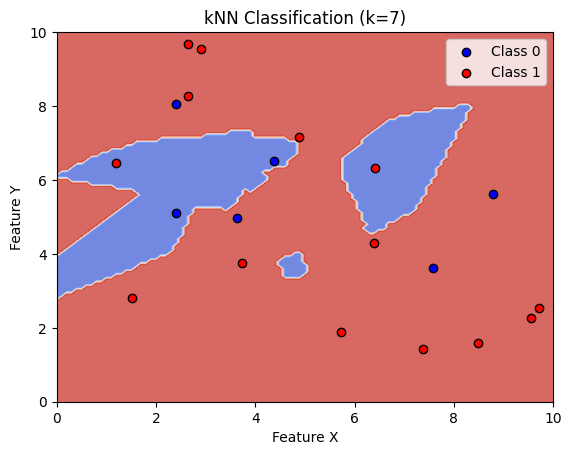

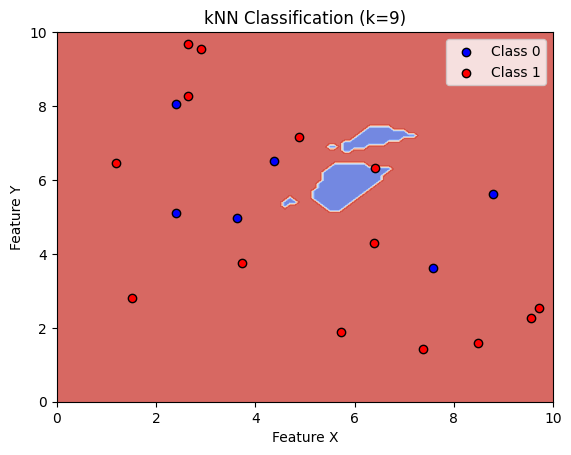

In [ ]:
# Repeat the kNN classification with different k values and observe the class boundaries
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    predicted_classes = knn.predict(test_points)
    Z = predicted_classes.reshape(X_test_knn.shape)

    plt.contourf(X_test_knn, Y_test_knn, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[classes == 0], Y[classes == 0], color='blue', edgecolor='k', label='Class 0')
    plt.scatter(X[classes == 1], Y[classes == 1], color='red', edgecolor='k', label='Class 1')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification (k={k})')
    plt.legend()
    plt.show()


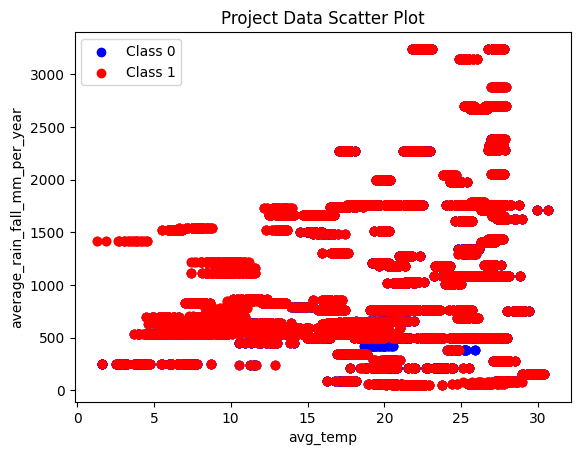

In [ ]:
# Select two features from your project data
feature_1 = 'avg_temp'
feature_2 = 'average_rain_fall_mm_per_year'
X = data[feature_1].values
Y = data[feature_2].values

# Assign classes based on some condition
classes = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Scatter plot of the selected features
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Project Data Scatter Plot')
plt.legend()
plt.show()

# Apply kNN classification (similar to A4 and A5) to your project data


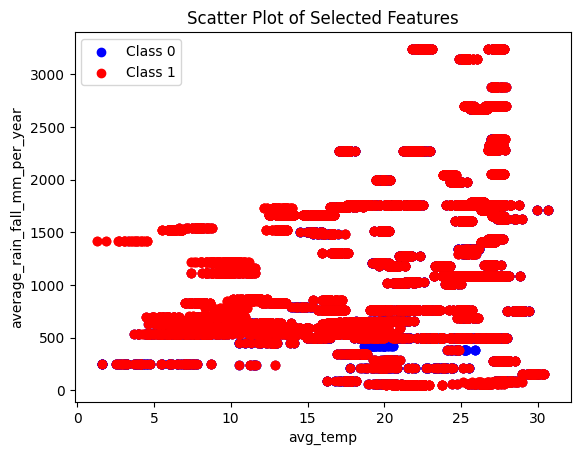

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Select two features for the scatter plot (for example, 'avg_temp' and 'average_rain_fall_mm_per_year')
feature_1 = 'avg_temp'
feature_2 = 'average_rain_fall_mm_per_year'

# Assign classes based on some condition (for example, whether 'hg/ha_yield' is above the median)
X = data[[feature_1, feature_2]].values
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Scatter plot of the selected features
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Scatter Plot of Selected Features')
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Example: Choose two features for kNN classification
X = data[['avg_temp', 'average_rain_fall_mm_per_year']].values
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the kNN model
knn = KNeighborsClassifier()

# Define the parameter distribution for kNN (testing k values from 1 to 30)
param_dist = {'n_neighbors': np.arange(1, 31)}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best k value
best_k_random = random_search.best_params_['n_neighbors']
print(f"Best k value found by RandomizedSearchCV: {best_k_random}")

# Best accuracy score
best_score_random = random_search.best_score_
print(f"Best accuracy achieved during RandomizedSearchCV: {best_score_random}")

# Evaluate on the test set
best_knn_random = random_search.best_estimator_
test_accuracy_random = best_knn_random.score(X_test, y_test)
print(f"Test set accuracy with best k (RandomizedSearchCV): {test_accuracy_random}")


Best k value found by RandomizedSearchCV: 28
Best accuracy achieved during RandomizedSearchCV: 0.6256769699507914
Test set accuracy with best k (RandomizedSearchCV): 0.6164286557299657


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Example: Choose two features for kNN classification
X = data[['avg_temp', 'average_rain_fall_mm_per_year']].values
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the kNN model
knn = KNeighborsClassifier()

# Define the parameter grid for kNN (testing k values from 1 to 30)
param_grid = {'n_neighbors': np.arange(1, 31)}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value found by GridSearchCV: {best_k}")

# Best accuracy score
best_score = grid_search.best_score_
print(f"Best accuracy achieved during GridSearchCV: {best_score}")

# Evaluate on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test set accuracy with best k: {test_accuracy}")


Best k value found by GridSearchCV: 27
Best accuracy achieved during GridSearchCV: 0.6266377277471596
Test set accuracy with best k: 0.6165466776820488


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
import pandas as pd
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Preprocess the data (example: encoding and scaling)
data = data.drop(columns=['Unnamed: 0'])
data = pd.get_dummies(data, columns=['Area', 'Item'])

# Select features and target
X = data.drop(columns=['hg/ha_yield'])
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Set Accuracy with XGBoost: {train_accuracy}")
print(f"Test Set Accuracy with XGBoost: {test_accuracy}")

# Confusion Matrix and Classification Report for Test Data
print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# GridSearchCV for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model from GridSearchCV on the test set
best_xgb_model = grid_search.best_estimator_
best_y_pred_test = best_xgb_model.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_y_pred_test)
print(f"Test Set Accuracy with Best XGBoost Model: {best_test_accuracy}")

# Confusion Matrix and Classification Report for the Best Model
print("\nBest Model Test Confusion Matrix:")
print(confusion_matrix(y_test, best_y_pred_test))
print("\nBest Model Test Classification Report:")
print(classification_report(y_test, best_y_pred_test))


Training Set Accuracy with XGBoost: 0.9872527694875816
Test Set Accuracy with XGBoost: 0.9774578071521303

Test Confusion Matrix:
[[4173  100]
 [  91 4109]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4273
           1       0.98      0.98      0.98      4200

    accuracy                           0.98      8473
   macro avg       0.98      0.98      0.98      8473
weighted avg       0.98      0.98      0.98      8473

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Test Set Accuracy with Best XGBoost Model: 0.9813525315708722

Best Model Test Confusion Matrix:
[[4188   85]
 [  73 4127]]

Best Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4273
           1       0.98  

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/mnt/climate-ds.csv'
data = pd.read_csv(file_path)

# Preprocess the data (example: encoding and scaling)
data = data.drop(columns=['Unnamed: 0'])
data = pd.get_dummies(data, columns=['Area', 'Item'])

# Select features and target
X = data.drop(columns=['hg/ha_yield'])
y = (data['hg/ha_yield'] > data['hg/ha_yield'].median()).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best accuracy score on training data
best_train_accuracy = random_search.best_score_
print(f"Best training accuracy achieved during RandomizedSearchCV: {best_train_accuracy}")

# Evaluate the best model from RandomizedSearchCV on the test set
best_xgb_model = random_search.best_estimator_
best_y_pred_test = best_xgb_model.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_y_pred_test)
print(f"Test Set Accuracy with Best XGBoost Model: {best_test_accuracy}")

# Confusion Matrix and Classification Report for the Best Model
print("\nBest Model Test Confusion Matrix:")
print(confusion_matrix(y_test, best_y_pred_test))
print("\nBest Model Test Classification Report:")
print(classification_report(y_test, best_y_pred_test))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best training accuracy achieved during RandomizedSearchCV: 0.9843189341223718
Test Set Accuracy with Best XGBoost Model: 0.9828868169479523

Best Model Test Confusion Matrix:
[[4192   81]
 [  64 4136]]

Best Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4273
           1       0.98      0.98      0.98      4200

    accuracy                           0.98      8473
   macro avg       0.98      0.98      0.98      8473
weighted avg       0.98      0.98      0.98      8473

